<a href="https://colab.research.google.com/github/ChungKelsey/classwork/blob/main/Int3095(group3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Int3095 Group Project

Chung Ki Ki 11443843
Kung S Y
Tang W L
Xiu R


# **K-Means**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the CSV file into a DataFrame
df = pd.read_csv(f"/content/heart_2020_cleaned.csv")

In [ ]:
# Display the first few rows of the dataframe to understand its structure
print(df.head())

In [ ]:
# Print the column names of the DataFrame
print("Column names in DataFrame:", df.columns)

In [ ]:
# Preprocessing

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(df, drop_first=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

In [ ]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

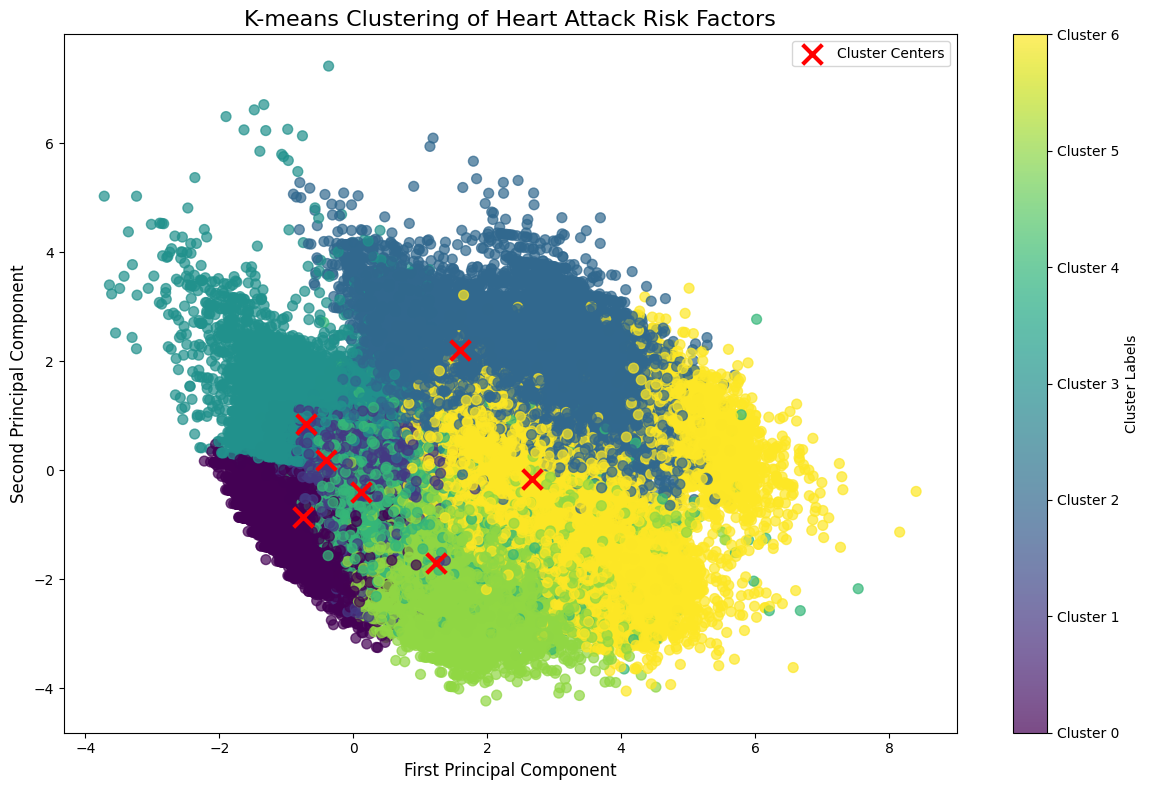

Cluster Characteristics:
   HeartDisease        BMI  PhysicalHealth  MentalHealth  AgeCategory  \
0      0.000000  25.424731        0.793112      2.136123     2.243517   
1      0.000000  26.428514        0.975985      0.981085     8.544881   
2      1.000000  29.232394        6.465668      2.965256     9.368628   
3      0.000285  26.636340        1.032752      0.936845     9.113853   
4      0.000926  38.611130        1.520491      2.062695     5.513776   
5      0.012397  28.545321        2.853652     24.539608     4.473818   
6      0.075234  30.085082       27.954860     11.773499     7.602812   

   SleepTime  
0   7.148478  
1   6.347717  
2   7.211296  
3   8.448210  
4   6.876129  
5   6.500224  
6   6.733108  


In [ ]:
# Select features relevant to heart attacks
heart_attack_features = ['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']
X_heart = df[heart_attack_features]

# Standardize the features
scaler = StandardScaler()
X_heart_scaled = scaler.fit_transform(X_heart)

# Perform K-means clustering
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_heart_scaled)

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_heart_scaled)

# Create a DataFrame for visualization
viz_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
viz_df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(viz_df['PC1'], viz_df['PC2'], c=viz_df['Cluster'],
                      cmap='viridis', alpha=0.7, s=50)

# Plot cluster centers
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')

# Customize the plot
plt.title('K-means Clustering of Heart Attack Risk Factors', fontsize=16)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.legend(loc='upper right')

# Add a color bar related to the clusters
cbar = plt.colorbar(scatter, label='Cluster Labels')
cbar.set_ticks(range(n_clusters))  # Set ticks to match cluster labels
cbar.set_ticklabels([f'Cluster {i}' for i in range(n_clusters)])  # Custom tick labels

plt.tight_layout()
plt.show()

# Analyze cluster characteristics
cluster_stats = X_heart.groupby(cluster_labels).mean()
print("Cluster Characteristics:")
print(cluster_stats)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


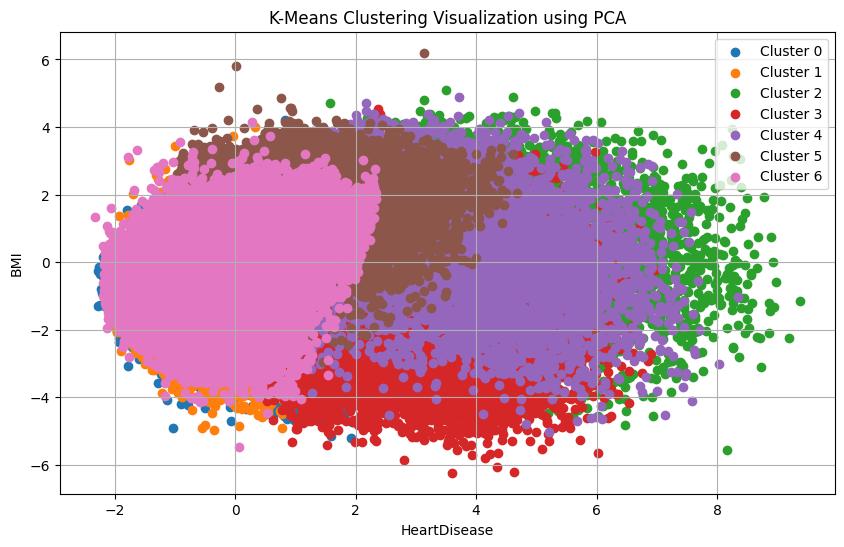

In [ ]:
# Choose the optimal number of clusters
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Perform PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=features_pca, columns=['HeartDisease', 'BMI'])
pca_df['Cluster'] = df['Cluster']

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['HeartDisease'],
                pca_df[pca_df['Cluster'] == cluster]['BMI'],
                label=f'Cluster {cluster}')

plt.title('K-Means Clustering Visualization using PCA')
plt.xlabel('HeartDisease')
plt.ylabel('BMI')
plt.legend()
plt.grid()
plt.show()

Accuracy of the model

In [ ]:
# Calculate the cluster means
cluster_means = df.groupby('Cluster').mean()
print("Cluster means:")
print(cluster_means)

# Count the cluster data
cluster_counts = df['Cluster'].value_counts()
print("Number of samples in each cluster:")
print(cluster_counts)

Cluster means:
         HeartDisease        BMI   Smoking  AlcoholDrinking    Stroke  \
Cluster                                                                 
0            0.038383  27.299524  0.607453         1.000000  0.000000   
1            0.027823  27.490181  0.309840         0.000000  0.000000   
2            0.293319  29.975492  0.500382         0.031667  0.126581   
3            0.207775  31.971807  0.587178         0.011111  0.000000   
4            0.339573  28.852332  0.562110         0.044810  1.000000   
5            0.129652  27.358048  0.427267         0.000568  0.000000   
6            0.057918  28.181056  0.397780         0.000000  0.000000   

         PhysicalHealth  MentalHealth  DiffWalking       Sex  AgeCategory  \
Cluster                                                                     
0              2.206089      5.134096     0.066878  0.481929     5.601510   
1              1.233434      3.622876     0.013750  0.000000     6.059827   
2              9.15

In [ ]:
# Analyze cluster characteristics
cluster_stats = X_heart.groupby(cluster_labels).mean()
print("Cluster Characteristics:")
print(cluster_stats)

Cluster Characteristics:
   HeartDisease        BMI  PhysicalHealth  MentalHealth  AgeCategory  \
0      0.000000  25.424731        0.793112      2.136123     2.243517   
1      0.000000  26.428514        0.975985      0.981085     8.544881   
2      1.000000  29.232394        6.465668      2.965256     9.368628   
3      0.000285  26.636340        1.032752      0.936845     9.113853   
4      0.000926  38.611130        1.520491      2.062695     5.513776   
5      0.012397  28.545321        2.853652     24.539608     4.473818   
6      0.075234  30.085082       27.954860     11.773499     7.602812   

   SleepTime  
0   7.148478  
1   6.347717  
2   7.211296  
3   8.448210  
4   6.876129  
5   6.500224  
6   6.733108  


ARI: 0.07195193297507885


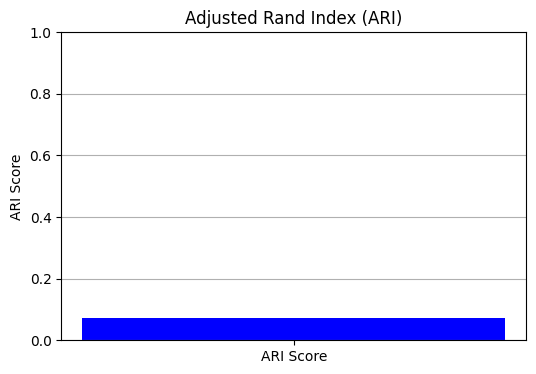

In [ ]:
from sklearn.metrics import adjusted_rand_score
y_true = df['MentalHealth'].values
ari_score = adjusted_rand_score(y_true, cluster_labels)
print(f'ARI: {ari_score}')

# Visualize the ARI
plt.figure(figsize=(6, 4))
plt.bar(['ARI Score'], [ari_score], color='blue')
plt.ylim(0, 1)  # ARI value should be between 0 to 1
plt.title('Adjusted Rand Index (ARI)')
plt.ylabel('ARI Score')
plt.grid(axis='y')
plt.show()

SSE of the Kmeans Clustering: 3913255.266448105


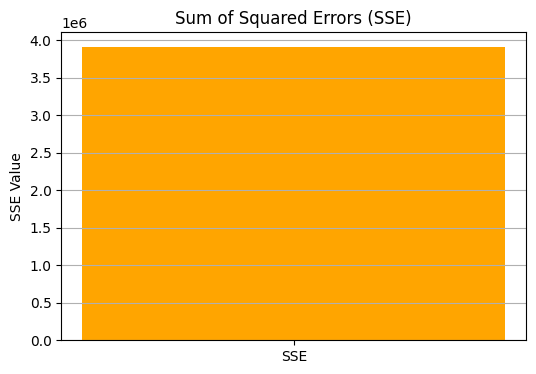

In [ ]:
# Calculate the SSE(Sum of squares due to error)
sse = kmeans.inertia_
print(f"SSE of the Kmeans Clustering: {sse}")

# Visualize the SSE
plt.figure(figsize=(6, 4))
plt.bar(['SSE'], [sse], color='orange')
plt.title('Sum of Squared Errors (SSE)')
plt.ylabel('SSE Value')
plt.grid(axis='y')
plt.show()

Davies-Bouldin index: 2.0811610552821125


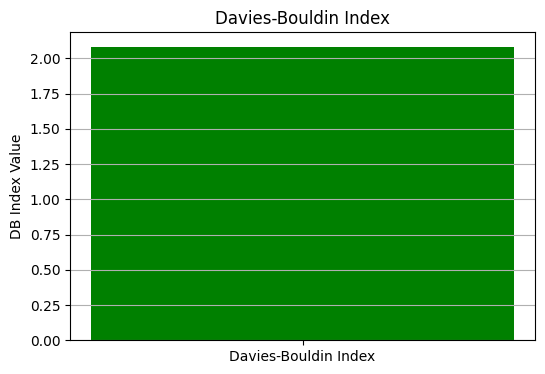

In [ ]:
from sklearn.metrics import davies_bouldin_score
# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"Davies-Bouldin index: {db_index}")

# Visualize the Davies-Bouldin Index
plt.figure(figsize=(6, 4))
plt.bar(['Davies-Bouldin Index'], [db_index], color='green')
plt.title('Davies-Bouldin Index')
plt.ylabel('DB Index Value')
plt.grid(axis='y')
plt.show()

# **Decision Tree**

In [ ]:
# Import libraries for data manipulation and visualization
import kagglehub  # Kaggle-specific library for dataset access
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations

# Import libraries for decision tree model
from sklearn import tree  # General tree utilities
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from graphviz import Source  # For visualizing decision trees
from sklearn.tree import export_graphviz  # Export decision trees to Graphviz format

# Import libraries for visualization
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Advanced data visualization

# Import libraries for model evaluation and splitting
from sklearn.model_selection import train_test_split, cross_val_score  # Dataset splitting and cross-validation
from sklearn.metrics import classification_report, confusion_matrix  # Model evaluation metrics
from sklearn.metrics import roc_curve, roc_auc_score  # ROC curve and AUC score
from sklearn.metrics import precision_score, recall_score, f1_score  # Precision, Recall, and F1-score


# Download the latest version of the dataset
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

# Load the CSV file into a DataFrame
df = pd.read_csv(f"{path}/2020/heart_2020_cleaned.csv")

# Display the first few rows of the DataFrame
print(df.head())

100%|██████████| 21.4M/21.4M [00:00<00:00, 108MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTim

In [ ]:
# Change the string to number code for data mining
Yes_No={'No':0, 'Yes':1}
sex = {'Male': 0, 'Female':1}
age = {'18-24':1, '25-29':2,'30-34': 3, '35-39':4, '40-44': 5, '45-49':6,'50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12, '80 or older':13}
race = {'White': 1, 'Hispanic': 2, 'Black': 3, 'Other': 4, 'American Indian/Alaskan Native': 5, 'Asian':6}
health={'Excellent':3, 'Very good': 2, 'Good': 1, 'Fair':0, 'Poor':-1}
#Unique Label of Heart Disease
HeartDisease=np.unique(df['HeartDisease'])


df['HeartDisease'] = df['HeartDisease'].map(Yes_No)
df['Smoking'] = df['Smoking'].map(Yes_No)
df['AlcoholDrinking']=df['AlcoholDrinking'].map(Yes_No)
df['Stroke']= df['Stroke'].map(Yes_No)
df['DiffWalking']=df['DiffWalking'].map(Yes_No)
df['Sex']=df['Sex'].map(sex)
df['AgeCategory']=df['AgeCategory'].map(age)
df['Race']=df['Race'].map(race)
df['Diabetic']=df['Diabetic'].map(Yes_No)
df['PhysicalActivity']=df['PhysicalActivity'].map(Yes_No)
df['GenHealth']=df['GenHealth'].map(health)
df['Asthma']=df['Asthma'].map(Yes_No)
df['KidneyDisease']=df['KidneyDisease'].map(Yes_No)
df['SkinCancer']=df['SkinCancer'].map(Yes_No)


#Pring the dataframe for checking
print(df)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffW

In [ ]:
# Getting the column headings
column_headings = df.columns.tolist()
column_headings=column_headings[1:]
print(column_headings)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [ ]:
#Kiki
#Make the record random order
df.sample(frac=1, random_state=99)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
8814,0,34.21,1,0,0,0.0,0.0,0,0,10,2,0.0,1,1,6.0,0,0,0
237540,0,30.68,0,0,0,0.0,0.0,1,0,4,2,0.0,0,1,6.0,0,0,0
252205,0,22.89,0,0,0,0.0,2.0,0,0,11,1,0.0,1,1,7.0,0,0,1
208285,0,26.15,0,0,0,0.0,6.0,0,0,11,1,0.0,1,2,6.0,0,0,0
28397,1,31.32,1,0,0,10.0,0.0,0,0,11,1,0.0,1,-1,9.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239305,0,38.62,1,0,0,0.0,0.0,0,1,10,1,0.0,1,1,8.0,0,0,0
167080,0,30.13,1,0,0,0.0,0.0,0,0,8,1,0.0,1,2,8.0,0,0,0
177337,0,28.97,1,0,0,30.0,30.0,1,0,9,1,0.0,1,1,8.0,1,0,0
23587,0,26.58,0,0,0,7.0,1.0,0,0,9,1,0.0,1,1,6.0,0,0,0


In [ ]:

# Split the data
#Set 25% record to be the test sample
testing_fraction = 0.25
split_index = int(df.shape[0] * testing_fraction)

In [ ]:

#Split the dataframe to be 75% for training, 25% for testing
training=df.iloc[split_index:]
test=df.iloc[:split_index]

In [ ]:

#Split the dataframe to be X(independent variable), y(dependent variable 'Heart Disease')
training_X=training.drop(['HeartDisease'],axis=1)
training_y=training['HeartDisease']

test_X=test.drop(['HeartDisease'],axis=1)
test_y=test['HeartDisease']


In [ ]:

#See if the split is correct
print(training_X.shape)
print(training_y.shape)
print(test_X.shape)
print(test_y.shape)

(239847, 17)
(239847,)
(79948, 17)
(79948,)


In [ ]:

#Build DecisionTree and train data
dtree= DecisionTreeClassifier(max_depth=5, random_state=99)
dtree.fit(training_X, training_y)

DecisionTreeClassifier(max_depth=5, random_state=99)

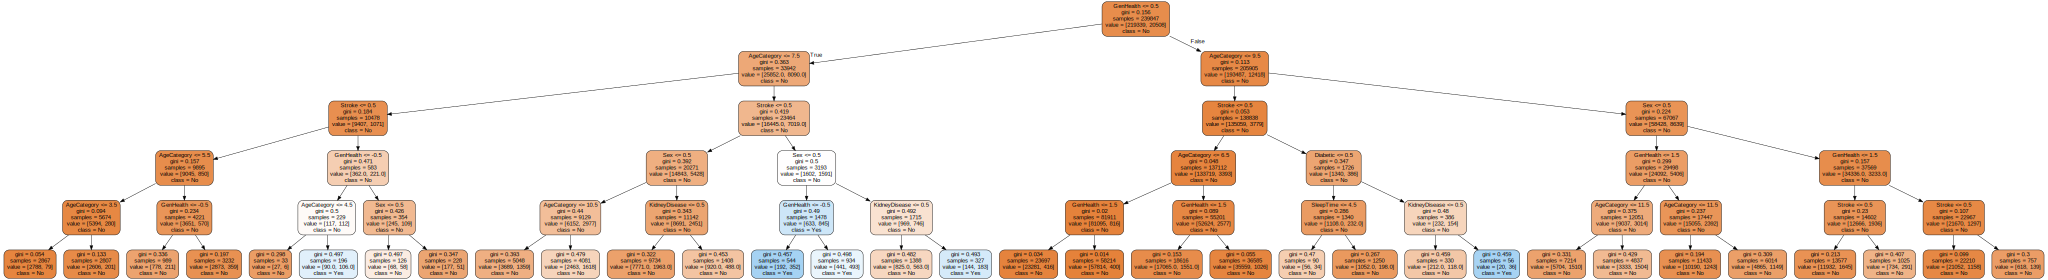

In [ ]:
#Show the tree
dot_data =export_graphviz(dtree, feature_names=column_headings, class_names=HeartDisease, rounded=True,filled=True)



graph = Source(dot_data)
graph

In [ ]:

#predict the test_X results
predict_y=dtree.predict(test_X)

In [ ]:

#Check correct
print(predict_y)

[0 0 0 ... 0 0 0]


In [ ]:

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predict_y == test_y)

In [ ]:

accuracy=correct_predictions/len(predict_y)

In [ ]:

# Display the accuracy as a single quantitative measure of overall performance
print(f"Accuracy :", accuracy, "(or", round(accuracy*100, 1), "%)")

Accuracy : 0.9152699254515435 (or 91.5 %)


In [ ]:
# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import display

# Download the dataset
#path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")
#print("Path to dataset files:", path)
"""
# Load the CSV file into a DataFrame
df = pd.read_csv(f"/content/heart_2020_cleaned.csv")
print(df.head())

# Data encoding mapping
Yes_No = {'No': 0, 'Yes': 1}
sex = {'Male': 0, 'Female': 1}
age = {
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4,
    '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8,
    '60-64': 9, '65-69': 10, '70-74': 11, '75-79': 12,
    '80 or older': 13
}
race = {
    'White': 1, 'Hispanic': 2, 'Black': 3, 'Other': 4,
    'American Indian/Alaskan Native': 5, 'Asian': 6
}
health = {'Excellent': 3, 'Very good': 2, 'Good': 1, 'Fair': 0, 'Poor': -1}

# Map heart disease labels
for column in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    df[column] = df[column].map(Yes_No)

df['Sex'] = df['Sex'].map(sex)
df['AgeCategory'] = df['AgeCategory'].map(age)
df['Race'] = df['Race'].map(race)
df['GenHealth'] = df['GenHealth'].map(health)

# Print the transformed DataFrame for inspection
print(df)

# Shuffle the data randomly
df = df.sample(frac=1, random_state=99)

# Split the dataset into training (75%) and testing (25%) sets
split_index = int(df.shape[0] * 0.25)
training = df.iloc[split_index:]
test = df.iloc[:split_index]

# Separate feature variables X and target variable y
training_X = training.drop(['HeartDisease'], axis=1)
training_y = training['HeartDisease']
test_X = test.drop(['HeartDisease'], axis=1)
test_y = test['HeartDisease']

# Build and train the decision tree model
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(training_X, training_y)

# Visualize the decision tree
dot_data = export_graphviz(dtree, feature_names=training_X.columns, class_names=['No', 'Yes'], rounded=True, filled=True)
graph = Source(dot_data)

# Display the graph in Jupyter Notebook
display(graph)

# Make predictions
predict_y = dtree.predict(test_X)

# Check prediction results
print(predict_y)

# Calculate accuracy
correct_predictions = sum(predict_y == test_y)
accuracy = correct_predictions / len(predict_y)

# Display accuracy
print(f"Accuracy: {accuracy:.2%} (or {round(accuracy * 100, 1)}%)")
"""

'\n# Load the CSV file into a DataFrame\ndf = pd.read_csv(f"/content/heart_2020_cleaned.csv")\nprint(df.head())\n\n# Data encoding mapping\nYes_No = {\'No\': 0, \'Yes\': 1}\nsex = {\'Male\': 0, \'Female\': 1}\nage = {\n    \'18-24\': 1, \'25-29\': 2, \'30-34\': 3, \'35-39\': 4,\n    \'40-44\': 5, \'45-49\': 6, \'50-54\': 7, \'55-59\': 8,\n    \'60-64\': 9, \'65-69\': 10, \'70-74\': 11, \'75-79\': 12,\n    \'80 or older\': 13\n}\nrace = {\n    \'White\': 1, \'Hispanic\': 2, \'Black\': 3, \'Other\': 4,\n    \'American Indian/Alaskan Native\': 5, \'Asian\': 6\n}\nhealth = {\'Excellent\': 3, \'Very good\': 2, \'Good\': 1, \'Fair\': 0, \'Poor\': -1}\n\n# Map heart disease labels\nfor column in [\'HeartDisease\', \'Smoking\', \'AlcoholDrinking\', \'Stroke\', \'DiffWalking\', \'Diabetic\', \'PhysicalActivity\', \'Asthma\', \'KidneyDisease\', \'SkinCancer\']:\n    df[column] = df[column].map(Yes_No)\n\ndf[\'Sex\'] = df[\'Sex\'].map(sex)\ndf[\'AgeCategory\'] = df[\'AgeCategory\'].map(age)\ndf[\

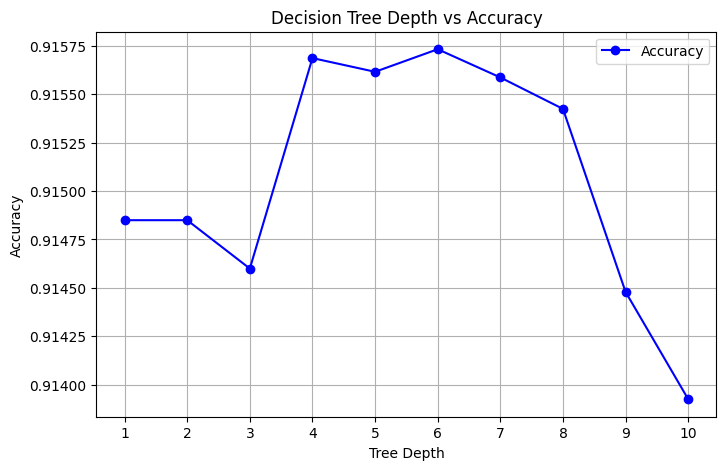

Best Depth: 6


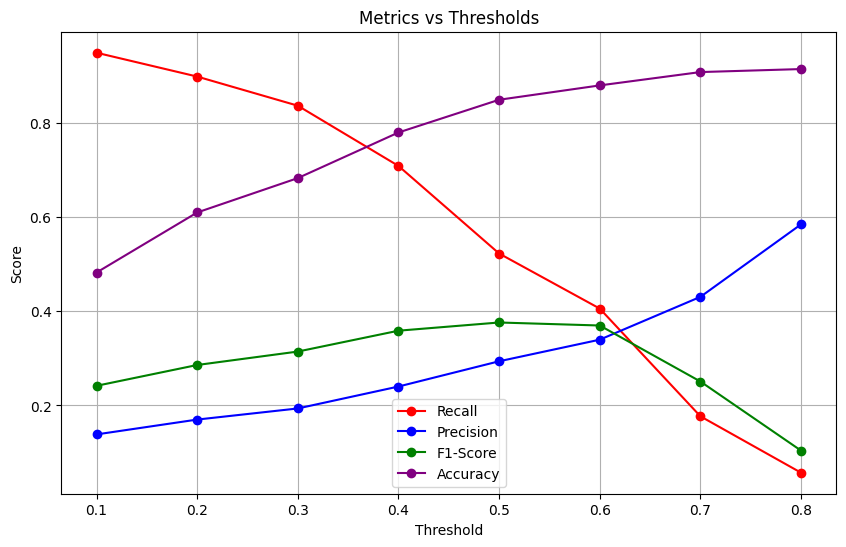

Optimal Threshold (Based on F1-Score): 0.5

Final Confusion Matrix:
[[64268  8731]
 [ 3317  3633]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     72999
           1       0.29      0.52      0.38      6950

    accuracy                           0.85     79949
   macro avg       0.62      0.70      0.65     79949
weighted avg       0.89      0.85      0.87     79949



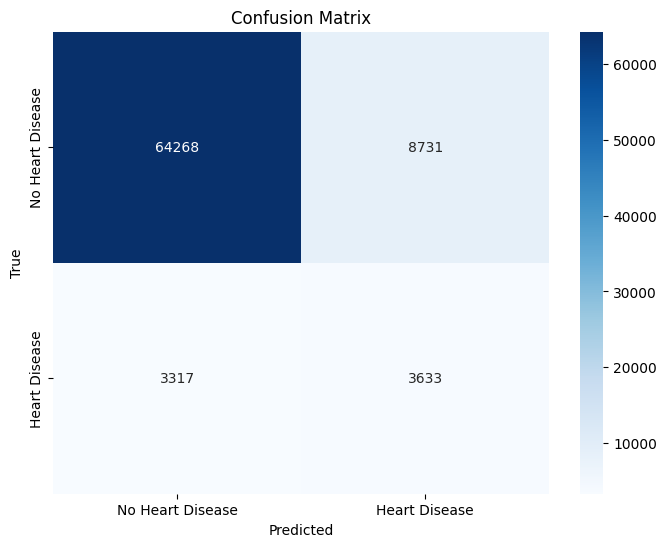

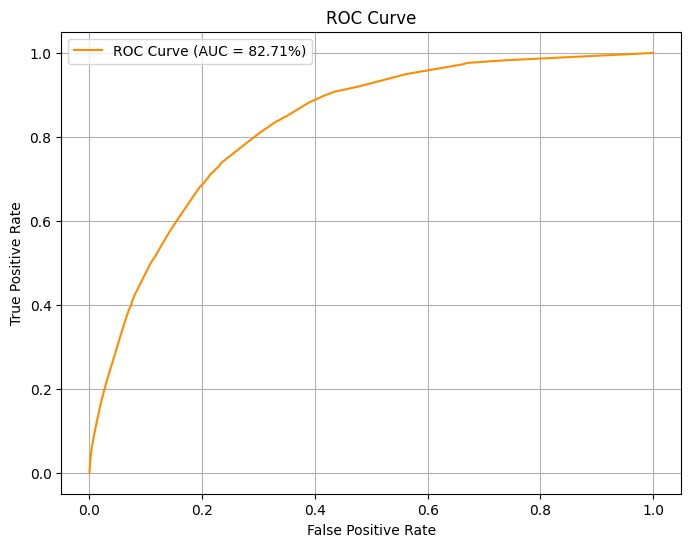

Adjusted Accuracy: 84.93%

Metrics at Different Thresholds:
   Threshold    Recall  Precision  F1-Score  Accuracy
0        0.1  0.949209   0.138491  0.241715  0.482282
1        0.2  0.898561   0.170015  0.285930  0.609851
2        0.3  0.836691   0.193627  0.314477  0.682898
3        0.4  0.708777   0.240187  0.358789  0.779772
4        0.5  0.522734   0.293837  0.376204  0.849304
5        0.6  0.405755   0.339718  0.369812  0.879786
6        0.7  0.176978   0.430672  0.250867  0.908116
7        0.8  0.057122   0.584683  0.104077  0.914508


In [ ]:
# Shuffle the data randomly
df = df.sample(frac=1, random_state=99)

# Split the dataset into training (75%) and testing (25%) sets
training, test = train_test_split(df, test_size=0.25, random_state=42)

# Separate the feature variables X and the target variable y
training_X = training.drop(['HeartDisease'], axis=1)
training_y = training['HeartDisease']
test_X = test.drop(['HeartDisease'], axis=1)
test_y = test['HeartDisease']

# Define a range for different depths and calculate accuracy for each depth
max_depths = range(1, 11)
results = []

for depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    # Use cross-validation to calculate accuracy
    scores = cross_val_score(dtree, training_X, training_y, cv=5, scoring='accuracy')
    results.append(scores.mean())

# Plot the relationship between depth and accuracy
plt.figure(figsize=(8, 5))
plt.plot(max_depths, results, marker='o', color='b', label='Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.grid()
plt.legend()
plt.show()

# Select the best depth for final model training
best_depth = max_depths[np.argmax(results)]
print(f"Best Depth: {best_depth}")

# Train the decision tree model with best depth and class weights to penalize FN
class_weights = {0: 1, 1: 5}
final_dtree = DecisionTreeClassifier(max_depth=best_depth, random_state=42, class_weight=class_weights)
final_dtree.fit(training_X, training_y)

# Predict probabilities instead of labels
predict_proba = final_dtree.predict_proba(test_X)[:, 1]

# Evaluate performance at multiple thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
metrics = []

for threshold in thresholds:
    predict_y = (predict_proba >= threshold).astype(int)
    conf_matrix = confusion_matrix(test_y, predict_y)

    # Calculate metrics
    recall = recall_score(test_y, predict_y)
    precision = precision_score(test_y, predict_y)
    f1 = f1_score(test_y, predict_y)
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
    metrics.append((threshold, recall, precision, f1, accuracy))

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Recall', 'Precision', 'F1-Score', 'Accuracy'])

# Plot metrics vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall', marker='o', color='red')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision', marker='o', color='blue')
plt.plot(metrics_df['Threshold'], metrics_df['F1-Score'], label='F1-Score', marker='o', color='green')
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy', marker='o', color='purple')
plt.title('Metrics vs Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Select the optimal threshold based on F1-Score
optimal_threshold = metrics_df.loc[metrics_df['F1-Score'].idxmax(), 'Threshold']
print(f"Optimal Threshold (Based on F1-Score): {optimal_threshold}")

# Use the optimal threshold for final predictions
predict_y = (predict_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(test_y, predict_y)
report = classification_report(test_y, predict_y)

print("\nFinal Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, roc_thresholds = roc_curve(test_y, predict_proba)
roc_auc = roc_auc_score(test_y, predict_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2%})', color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Print adjusted accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print(f"Adjusted Accuracy: {accuracy:.2%}")

# Print metrics for all thresholds
print("\nMetrics at Different Thresholds:")
print(metrics_df)